## **BCPM0090-2020-Assignment-20159407**


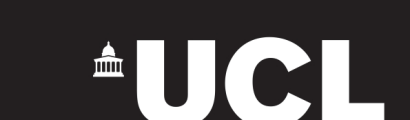

*   Student Number: 20159407
*   Module Code: BCPM0090
*   Module Title: Big Data and Business Analytics
*   Module Leader: Dr Carlos Galera-Zarco


---








In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [ ]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime

# 1 Problem Statement



## 1.1 Justify the choice of the dataset

###1.1.1 Preliminary exploratory analysis of the selected dataset

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

Based on the above information, the justification of the selected dataset is developed as below.

###1.1.2 State the rationale for selecting the dataset

The dataset I selected is the first one about the satisfaction of the customer with Airline services. Comparing with the other two datasets, it has a total of 24 columns and 3116750 rows, which contains more information. Therefore, the first dataset is more suitable for using machine learning models to conduct analysis due to its largest volume of data. Moreover, the 24th column -"Satisfaction"- can naturally be used as the label of our model. 

The second dataset about the movies is too small, with only 593 training data, which is obviously not suitable for using machine learning models. 

As for the third dataset has fewer columns than the first one, so there will be fewer variables to analyse. nd there is no particularly obvious regression goal or classification goal.



## 1.2 Define the research problem 

Based on the existing data, we could predict and analyse customer satisfaction by using machine learning modelling from the perspective of customer age, flight distance and cabin difference. After that, visualisation is performed to finally establishing a high-quality customer satisfaction prediction model. This analysis is conducted to explore the key factors influencing customer satisfaction and to provide the practical reference to develop a sustainable strategy in the airline industry.

The research problem could be defined as follows:

Research Question: What are the key factors that affect customer satisfaction with the Airline serivces?

##1.3 Explain the characteristics of the dataset

In [ ]:
df = pd.read_csv('/content/Exam1_Airline.csv')
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [ ]:
df["satisfaction"].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

In [ ]:
print("satisfaction rate:",56428/129880*100,"%")
print("no satisfaction rate:",73452/129880*100,"%")

satisfaction rate: 43.44625808438558 %
no satisfaction rate: 56.55374191561441 %


In [ ]:
list(df.columns)

['Unnamed: 0',
 'Gender',
 'customer_type',
 'age',
 'type_of_travel',
 'customer_class',
 'flight_distance',
 'inflight_wifi_service',
 'departure_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes',
 'satisfaction']

In [ ]:
t = pd.crosstab(index=df['satisfaction'], columns=df['age'],margins=True)
print(t)

age                        7    8    9   10   11  ...  78  79   80  85     All
satisfaction                                      ...                         
neutral or dissatisfied  620  716  734  711  707  ...  30  38   79  19   73452
satisfied                 65   81  125  111  130  ...  14  14   31   6   56428
All                      685  797  859  822  837  ...  44  52  110  25  129880

[3 rows x 76 columns]


In [ ]:
t = pd.crosstab(index=df['satisfaction'], columns=df['customer_class'],margins=True)
print(t)
print("satisfaction rate of Business class:",43166/62160*100,"%")

customer_class           Business    Eco  Eco Plus     All
satisfaction                                              
neutral or dissatisfied     18994  47366      7092   73452
satisfied                   43166  10943      2319   56428
All                         62160  58309      9411  129880
satisfaction rate of Business class: 69.44337194337194 %


In [ ]:
t = pd.crosstab(index=df['satisfaction'], columns=df['seat_comfort'],margins=True)
print(t)

seat_comfort             0      1      2      3      4      5     All
satisfaction                                                         
neutral or dissatisfied  1  11734  14341  18334  17481  11561   73452
satisfied                0   3374   4188   4994  22275  21597   56428
All                      1  15108  18529  23328  39756  33158  129880


In [ ]:
t = pd.crosstab(index=df['satisfaction'], columns=df['inflight_wifi_service'],margins=True)
print(t)

inflight_wifi_service       0      1      2      3      4      5     All
satisfaction                                                            
neutral or dissatisfied    10  15000  24330  24080   9891    141   73452
satisfied                3906   7328   7990   8105  14884  14215   56428
All                      3916  22328  32320  32185  24775  14356  129880


### 1.3.1 Data type


The dataset is a .csv file, which can be displayed in a table form, so it is structured data.

###1.3.2 Variables

There are a24 columns of data in total,  each with 129,880 entries. For example, The variable -"flight_distance"- is an integer, and the variable -"arrival_delay_in_minutes"- is a float type. 

Variables such as "gender" and ‘’type_of_travel" are not numerical variables, so they need to be converted into numeric variables later for modelling analysis.

###1.3.3 Initial potential

First,I count the satisfaction rate and dissatisfaction rate of all passengers. As you can see, the satisfaction rate is 43.44625808438558% which is slightly less than the no satisfaction rate of 56.55374191561441%.

By the way of statistics, I can see the different types of age, customer_class, seat_comfortm, and inflight_wifi_service, the number of satisfied customers and the number of dissatisfied customers. I find that the probability of female customers being dissatisfied is basically the same as the probability of male customers being dissatisfied with customers of different ages. Therefore age and gender may be not potential data.

For different types of customer_class, obviously have a greater impact on customer satisfaction.Among them, the customer satisfaction rate of Busines is as high as 69.4%, which is higher than the satisfaction rate of all passengers. Therefore, the variable customer_class also has potential.

For seat_comfortm, we can find that increasing from 0 to 5, customer satisfaction is on the rise.

For inflight_wifi_service, we can find that increasing from 1 to 5, customer satisfaction is on the rise. But when inflight_wifi_service=0, the satisfaction is very high, which is a more abnormal phenomenon. Presumably, 0 means that the customer does not use wifi.

The last column of data satisfaction is obviously also very potential, because this column of data is what we ultimately want to explore. 

##1.4 Process of cleaning and tidying the database

In [ ]:
df.isnull().sum(axis=0)

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

I will check if there are missing values in the respective segments. If so, we need to fill in the missing fields.

In [ ]:
df.dropna(inplace=True,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   customer_type                      129487 non-null  object 
 3   age                                129487 non-null  int64  
 4   type_of_travel                     129487 non-null  object 
 5   customer_class                     129487 non-null  object 
 6   flight_distance                    129487 non-null  int64  
 7   inflight_wifi_service              129487 non-null  int64  
 8   departure_arrival_time_convenient  129487 non-null  int64  
 9   ease_of_online_booking             129487 non-null  int64  
 10  gate_location                      129487 non-null  int64  
 11  food_and_drink                     1294

Since 393 pieces of data are missing in the arrival_delay_in_minutes column, we choose to delete these data. The amount of deleted data is smaller than the original amount, so it is still feasible to use the deleted data.

In [ ]:
feature_columns = ['Gender','customer_type','age','type_of_travel','customer_class','flight_distance','inflight_wifi_service','departure_arrival_time_convenient','ease_of_online_booking','gate_location',
                'food_and_drink','online_boarding','seat_comfort','inflight_entertainment','onboard_service','leg_room_service','baggage_handling','checkin_service','inflight_service','cleanliness','departure_delay_in_minutes','arrival_delay_in_minutes']
features = df[feature_columns]
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

I discarded the first column when selecting features. The first column is only used as a number, which is only a number for customers and has no practical meaning. Therefore, the number in the first column needs to be discarded and not used as a feature. The number of feature columns is 22.

In [ ]:
target = df['satisfaction']
target.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

In [ ]:
features_withdummies = pd.get_dummies(features)
features_withdummies.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Female,Gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,0,1,0,1,0,0


In [ ]:
features_withdummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   age                                129487 non-null  int64  
 1   flight_distance                    129487 non-null  int64  
 2   inflight_wifi_service              129487 non-null  int64  
 3   departure_arrival_time_convenient  129487 non-null  int64  
 4   ease_of_online_booking             129487 non-null  int64  
 5   gate_location                      129487 non-null  int64  
 6   food_and_drink                     129487 non-null  int64  
 7   online_boarding                    129487 non-null  int64  
 8   seat_comfort                       129487 non-null  int64  
 9   inflight_entertainment             129487 non-null  int64  
 10  onboard_service                    129487 non-null  int64  
 11  leg_room_service                   1294

Then I re-encode the features. For example, the variable gender originally has two values, one is male and the other is female. Therefore age is obviously a binary variable. Encode age into two variables Gender_Female and Gender_Male. Gender_Female=1 means female, and Gender_Male=1 means male.

After recoding, our data is expanded from 22 columns to 26 columns.

# 2 Analysis

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features_withdummies, target, test_size=0.3, random_state=0)
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90640 entries, 104965 to 68473
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                90640 non-null  int64  
 1   flight_distance                    90640 non-null  int64  
 2   inflight_wifi_service              90640 non-null  int64  
 3   departure_arrival_time_convenient  90640 non-null  int64  
 4   ease_of_online_booking             90640 non-null  int64  
 5   gate_location                      90640 non-null  int64  
 6   food_and_drink                     90640 non-null  int64  
 7   online_boarding                    90640 non-null  int64  
 8   seat_comfort                       90640 non-null  int64  
 9   inflight_entertainment             90640 non-null  int64  
 10  onboard_service                    90640 non-null  int64  
 11  leg_room_service                   90640 non-null

For training data and test data, segmentation is required to prevent overfitting.
We can see a total of 90,640 feature data used for training.

In [ ]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38847 entries, 43170 to 25002
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                38847 non-null  int64  
 1   flight_distance                    38847 non-null  int64  
 2   inflight_wifi_service              38847 non-null  int64  
 3   departure_arrival_time_convenient  38847 non-null  int64  
 4   ease_of_online_booking             38847 non-null  int64  
 5   gate_location                      38847 non-null  int64  
 6   food_and_drink                     38847 non-null  int64  
 7   online_boarding                    38847 non-null  int64  
 8   seat_comfort                       38847 non-null  int64  
 9   inflight_entertainment             38847 non-null  int64  
 10  onboard_service                    38847 non-null  int64  
 11  leg_room_service                   38847 non-null 

A total of 38847 pieces of characteristic data were used for testing.
The total number of feature data in the training set and test set is 129,487, which is consistent with the total number of feature data processed before.

In [ ]:
model_rf=RandomForestClassifier(oob_score = True, max_features = 'auto', n_estimators = 100, min_samples_leaf = 2, random_state = 0)

n_estimators = 100 means that the number of decision trees in the random forest is 100
The number of trees in the forest.

min_samples_leaf = 2 means that the minimum number of leaf nodes is 2.

The minimum number of samples required to be at a leaf node

In [ ]:
model_rf.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
mean_model_accuracy = model_rf.oob_score_
print("Model accuracy: "+str(mean_model_accuracy))

Model accuracy: 0.9613857016769638


With samples outside the bag, the accuracy of this tree can be evaluated. Therefore, the model does not require cross-validation. Finally, the results of multiple subtrees are averaged to obtain the results of the random forest model

In [ ]:
baseline_rf = DummyClassifier(strategy='stratified',random_state=0)
baseline_rf.fit(features_train, target_train)
baseline_model_accuracy = baseline_rf.score(features_test, target_test)
print("Model accuracy: "+str(baseline_model_accuracy))

Model accuracy: 0.5104898705176719


I choose to use Dummy Classifier model to get a baseline which generates predictions by respecting the training set’s class distribution.

In [ ]:
y_pred = model_rf.predict(features_test)
y_true = np.array(target_test)
categories = np.array(target.sort_values().unique())
print(classification_report(y_true, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     22014
              satisfied       0.97      0.94      0.96     16833

               accuracy                           0.96     38847
              macro avg       0.96      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



This analysis uses the verification set of features (features_test) and the verification set of tags (target_test) for model evaluation.

The accuracy of the model is relatively high. The prediction accuracy rate for satisfied customers is 96%, and the prediction accuracy rate for dissatisfied customers is 97%.
The recall rate of dissatisfied customers is 98%, and the recall rate of satisfied customers is 94%.

The f1 value is the harmonic average of precision and recall, and the scores are 0.97 and 0.96.



It can be seen from the above indicators that our model works well. It can predict and classify customer satisfaction through features more accurately.

In [ ]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]  

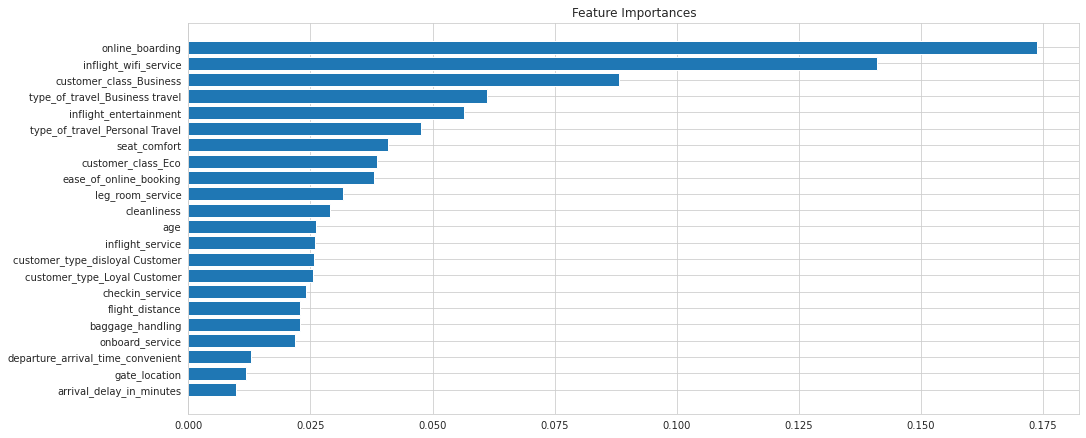

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Feature Importances")
plt.barh(range(22), importances[indices][:22], align="center")
plt.yticks(range(22), features_withdummies.columns[indices][:22])
plt.gca().invert_yaxis()
plt.tight_layout(pad=0.4)
plt.show()

Through the contribution of features to the model, the importance of each feature can be obtained.

Therefore, we can see that the most important influencing factor is "online_boarding", followed by "inflight_wifi_service".
The least important factor is "arrival_delay_in_minutes".

# 3 Visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
sns.set_style('whitegrid')
data = pd.read_csv('/content/Exam1_Airline.csv')
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


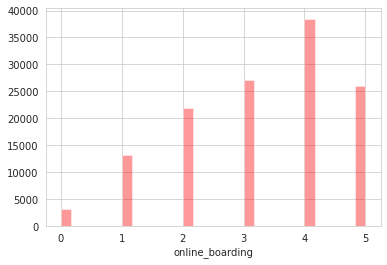

In [ ]:
sns.distplot(data['online_boarding'],bins=30,kde=False,color='red')

By drawing the frequency distribution histogram of online_boarding, we can clearly see the number of online_boarding under different values

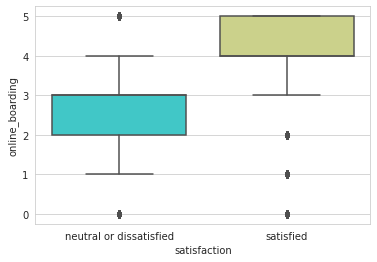

In [ ]:
sns.boxplot(x='satisfaction',y='online_boarding',data=data,palette='rainbow' )

It can be seen from the box diagram that dissatisfied customers are mainly concentrated in the range 1-4 of online_boarding.Satisfied customers are mainly concentrated in the 4-5 range of online_boarding.

Confusion matrix, without normalization
[[21551   463]
 [ 1002 15831]]


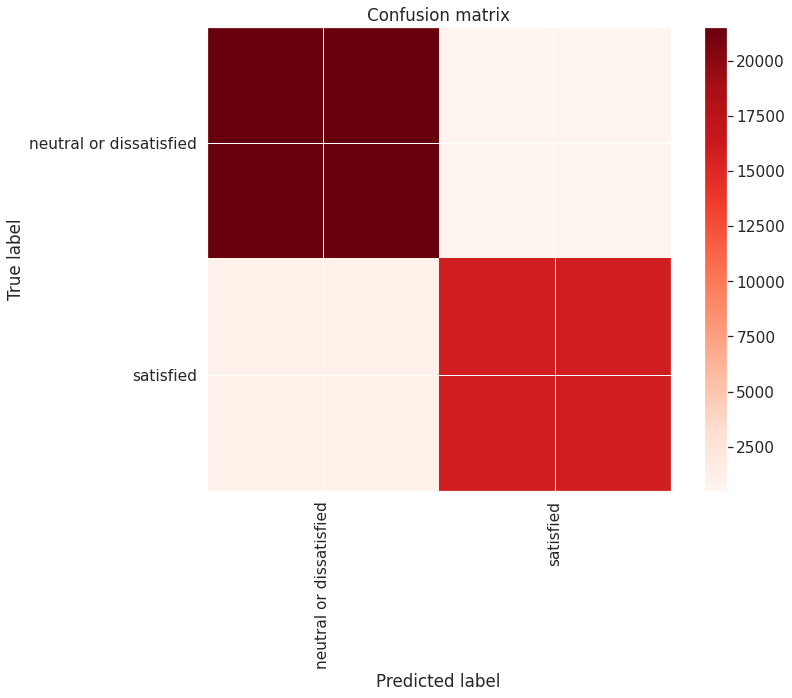

In [ ]:
def plot_confusion_matrix(cm, categories, title='Confusion matrix', cmap='Reds'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks,categories, rotation=90)
    plt.yticks(tick_marks,categories)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

sns.set(font_scale=1.4)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cm, categories)

A confusion matrix is a visualization that helps a user understand which classes are being misclassified. From the above figure, we can see that the data is mainly concentrated in the upper left corner and the lower left corner, which is the diagonal of the confusion matrix, indicating that the prediction accuracy is high.



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',max_iter=100000)
lr.fit(features_train,target_train) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score = lr.score(features_train,target_train)
print("score in training set:",score)
score = lr.score(features_test,target_test)
print("score in test set:",score)

score in training set: 0.8744814651368049
score in test set: 0.8707750920276984


The score of Logical regression model in the training set and test set is 0.874 and 0.871.
The difference between the two scores was not large, indicating that there was no problem of fitting
However, the model score is lower than that of random forest, indicating that the effect is not as good as that of random forest


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[-1.19e-02 -4.20e-05  3.72e-01 -1.51e-01 -1.14e-01 -1.20e-02 -3.50e-02
   5.76e-01  7.35e-02  2.16e-02  3.18e-01  2.37e-01  1.29e-01  3.19e-01
   1.21e-01  2.60e-01  5.79e-03 -1.05e-02 -1.49e+00 -1.43e+00 -3.31e-01
  -2.59e+00 -4.55e-02 -2.88e+00 -4.64e-01 -1.12e+00 -1.34e+00]]
[-2.93]


Look at the feature coefficient and intercept term respectively
The feature coefficient is the coefficient before the feature, the absolute value of which indicates the importance of each feature

In [ ]:
coef_c1 = pd.DataFrame({'var':pd.Series(features_test.columns),'coef_abs':abs(pd.Series(lr.coef_[0].flatten()))})
coef_c1 = coef_c1.sort_values(by = 'coef_abs',ascending=False)
coef_c1.to_csv("LR_importance.csv",index=False,sep=',')
print(coef_c1)

                                  var  coef_abs
23     type_of_travel_Personal Travel  2.852442
21    customer_type_disloyal Customer  2.499922
18                      Gender_Female  1.516009
19                        Gender_Male  1.439173
26            customer_class_Eco Plus  1.324986
25                 customer_class_Eco  1.177832
7                     online_boarding  0.598651
20       customer_type_Loyal Customer  0.455260
24            customer_class_Business  0.452365
2               inflight_wifi_service  0.405491
13                    checkin_service  0.323140
10                    onboard_service  0.291879
11                   leg_room_service  0.246707
15                        cleanliness  0.225209
4              ease_of_online_booking  0.159008
3   departure_arrival_time_convenient  0.125405
12                   baggage_handling  0.122627
14                   inflight_service  0.111627
22     type_of_travel_Business travel  0.102740
9              inflight_entertainment  0

Online_boarding, inflight_wifi_service and customer_class_Business are the three most important features in the random forest model, ranking eighth, tenth and ninth respectively in the LR regression model.

The three most important characteristics in the logistic regression model are type_of_travel_Personal Travel，customer_type_disloyal Customer，Gender_FemaleThe importance of them in the random forest are the 6th, 18th and 26th.

# 4 Recommendations

According to the random forest model, food and water, flight distance, gender and other factors have little influence on customer satisfaction. So airlines should pay more attention to those more important features, such as Online_boarding, inflight_wifi_service and customer_class. Improve the service quality of Online_boarding, and help people buy business class tickets at a low price through discount promotion.

For variabls related to the Internet, people tend to pay more attention, such as online_boarding and inflight_wifi_service.There is less emphasis on traditional service, such as baggage handling.Therefore, airline also needs to better build a network platform to provide better information services



# 5 Conclusion

I have established a random forest model and a logistic regression model, and the random forest model has achieved good results, with the classification accuracy reaching 96%.

Through the random forest model, we can see the importance of factors.Online_boarding, inflight_wifi_service and customer_class_Business are the most critical three factors.

Therefore, airlines need to enhance the quality of online_boarding and inflight_wifi_service, which can improve customer satisfaction. In addition, more passengers could be upgraded by offering discounts which can also enhance customers' satisfaction.

## 6 Reference

BAN, H.-J. & KIM, H.-S. 2019. Understanding Customer Experience and Satisfaction through Airline Passengers’ Online Review. Sustainability, 11, 4066.

KUMAR, S. & ZYMBLER, M. 2019. A machine learning approach to analyze customer satisfaction from airline tweets. Journal of Big Data, 6.

LESTARI, Y. D. & MURJITO, E. A. 2020. Factor Determinants of Customer Satisfaction with Airline Services Using Big Data Approaches. Jurnal Pendidikan Ekonomi Dan Bisnis (JPEB), 8, 34-42.

PARK, E. 2019. The role of satisfaction on customer reuse to airline services: An application of Big Data approaches. Journal of Retailing and Consumer Services, 47, 370-374.

PARK, E., JANG, Y., KIM, J., JEONG, N. J., BAE, K. & DEL POBIL, A. P. 2019. Determinants of customer satisfaction with airline services: An analysis of customer feedback big data. Journal of Retailing and Consumer Services, 51, 186-190.



